## IMPORTING RELEVANT MODULES


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## LOADING THE DATA


In [3]:
ri = pd.read_csv(r"C:\Users\mpmeh\Downloads\police.csv") # ri stands for 'rhode island'
print(ri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB
None


## CLEANING THE DATA

In [4]:
# as we can see 'county_name' column is null all the way and 'search_type' has very few entries respective to
# the whole dataframe, also the state coulmn will also be dropped because it's Rhode Island only
# thus we are going to drop the whole columns
ri.drop(['county_name','search_type','state'],axis='columns',inplace=True)
#dropping all the rows that donot contain gender as our main focus is on tracking gender based activity
ri.dropna(subset=['driver_gender'],inplace=True)




## CHANGING THE DATATYPES

In [5]:
#combinig the date and time column for easy analysis
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')
#converting the combined column to datetime object and adding it to the dataframe
ri['date_and_time'] = pd.to_datetime(combined)
# setting the index of the dataframe to 'date_and_time' for easy analysis
ri.set_index('date_and_time',inplace=True)


## VIOLATIONS OF EACH GENDER

In [6]:
# creating a separate database for male and female
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']
# creating a separate dataframe for violation proportion of each gender
F_vio = female.violation.value_counts(normalize=True)
M_vio = male.violation.value_counts(normalize=True)
viol = pd.DataFrame({'Female':F_vio,'Male':M_vio})
print(viol.head())
# plotting the graph

#viol.plot(kind='bar',subplots = True,xaxis)   
#plt.xlabel(viol.index)                              # the plot is wrong,make some changes
#plt.show()

                       Female      Male
Equipment            0.105199  0.134158
Moving violation     0.138218  0.206144
Other                0.029738  0.058985
Registration/plates  0.044418  0.042175
Seat belt            0.024312  0.036296


## DOES GENDER EFFECT CITATION PROPORTION ON SPEEDING ?


In [7]:
F_speed = female[female.violation=='Speeding'].stop_outcome.value_counts(normalize=True)
M_speed = male[male.violation=='Speeding'].stop_outcome.value_counts(normalize=True)
print(F_speed)
print(M_speed)
print("\nSince both around 95% got citation, we can say that gender is not related to citation")

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

Since both around 95% got citation, we can say that gender is not related to citation


## DOES GENDER EFFECT SEARCH CONDUCTED ?


In [8]:
# calculating percentage of people's vehicle being searched
print(ri.search_conducted.mean())
# calculating percentage of female driver being searched
print(ri[ri.driver_gender=='F'].search_conducted.mean())
# calculating percentage of male driver being searched
print(ri[ri.driver_gender=='M'].search_conducted.mean())
# grouping by to ascertain the data
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())
print('\n','We can see that that the search rate is almost double in males as compared to females')

0.0382153092354627
0.019180617481282074
0.04542557598546892
violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

 We can see that that the search rate is almost double in males as compared to females


## DOES GENDER AFFECT ARREST RATE ?

0.0355690117407784
               search_conducted  drugs_related_stop
date_and_time                                      
0                      0.074036            0.020738
1                      0.072367            0.019579
2                      0.063036            0.019396
3                      0.074740            0.019868
4                      0.036000            0.020000
5                      0.026738            0.010695
6                      0.013171            0.001927
7                      0.012803            0.002743
8                      0.020437            0.004249
9                      0.024428            0.005601
10                     0.029482            0.008182
11                     0.027320            0.007881
12                     0.031358            0.005466
13                     0.033414            0.008793
14                     0.031543            0.008449
15                     0.034041            0.007565
16                     0.039515            0.

Text(0.5, 1.0, 'Arrest rate by hour')

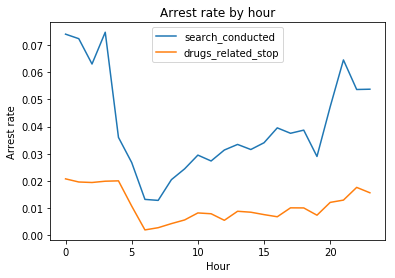

In [18]:
# caculating overall arrest rate
print(ri.is_arrested.mean())
# calculating hourly arrest rate
print(ri.groupby(ri.index.hour).mean())
hourly_arrest_rate = ri.groupby(ri.index.hour).mean()
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest rate')
plt.title('Arrest rate by hour')

## DOES RACE AFFECT THE GENDER ?


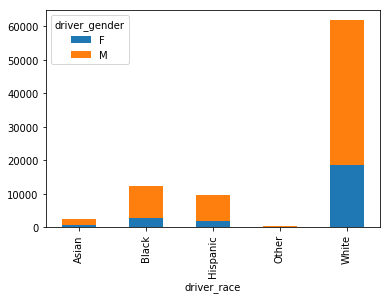

Clearly in every race the male gender is affected more!


In [20]:
all_df = pd.crosstab(ri.driver_race,ri.driver_gender)
all_df.plot(kind='bar',stacked=True)
plt.show()
print('Clearly in every race the male gender is affected more!')